In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [6]:
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


(0.0, 3974.15)

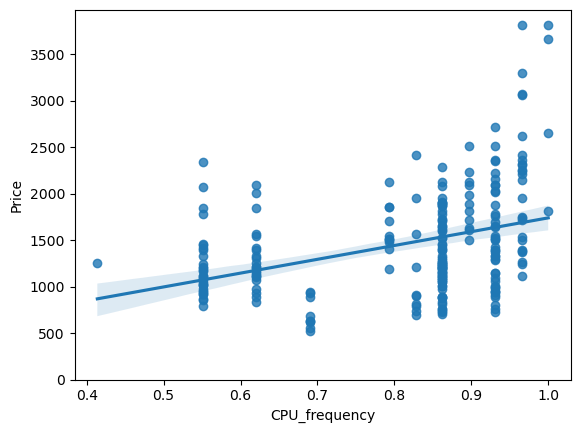

In [10]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

In [13]:
df[["CPU_frequency", "Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


(0.0, 3974.15)

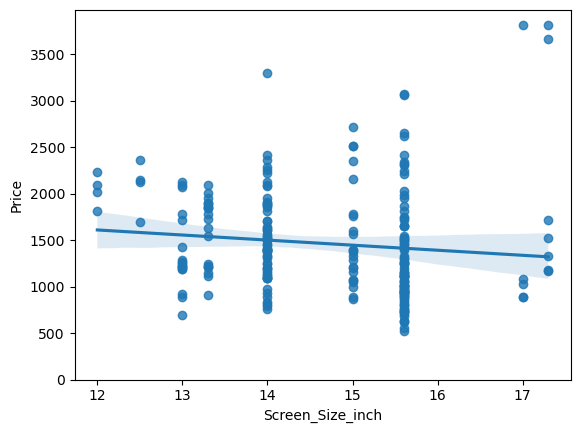

In [16]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

In [18]:
df[["Screen_Size_inch", "Price"]].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


(0.0, 3974.15)

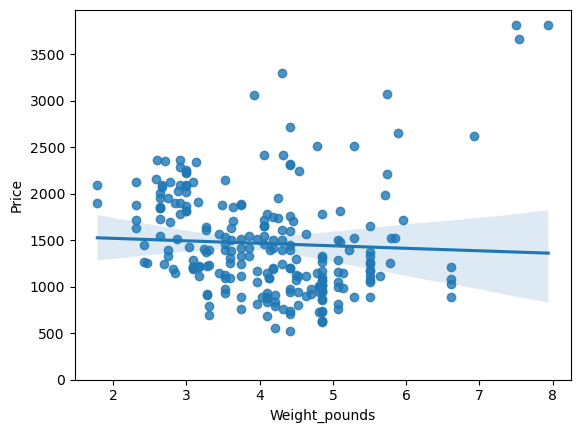

In [20]:
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [24]:
df[["Weight_pounds", "Price"]].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


Primeras observaciones, 
* Observamos que"Screen_Size_inch" y "Weight_pounds" estan negativamente correlacionadas con el precio pero son insignificantes con -0.11 y -0.05 respectivamente
* "CPU_frequency" esta positivamente correlacionada con el precio pero tampoco es determinante con su valor de 0.36

### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

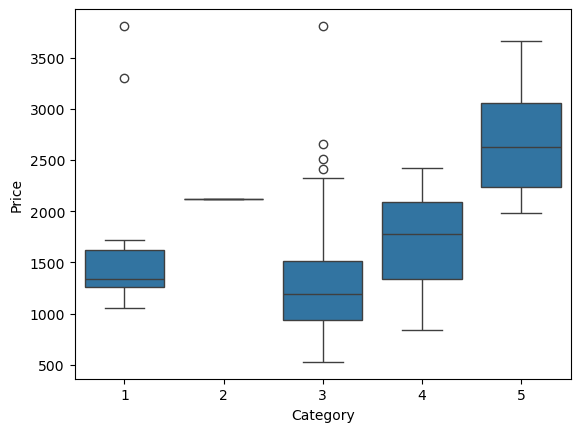

In [29]:
sns.boxplot(x = "Category", y = "Price", data = df)

<Axes: xlabel='GPU', ylabel='Price'>

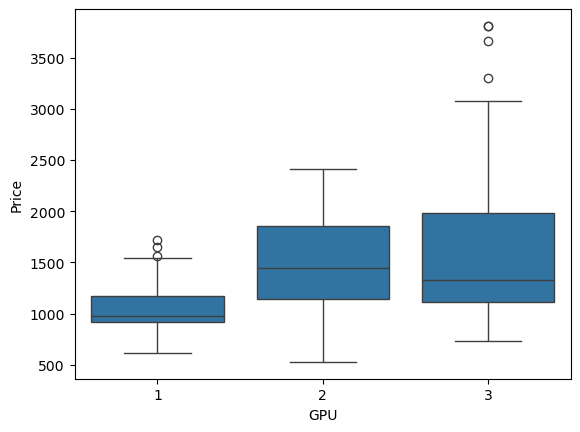

In [31]:
sns.boxplot(x = "GPU", y = "Price", data = df)

<Axes: xlabel='OS', ylabel='Price'>

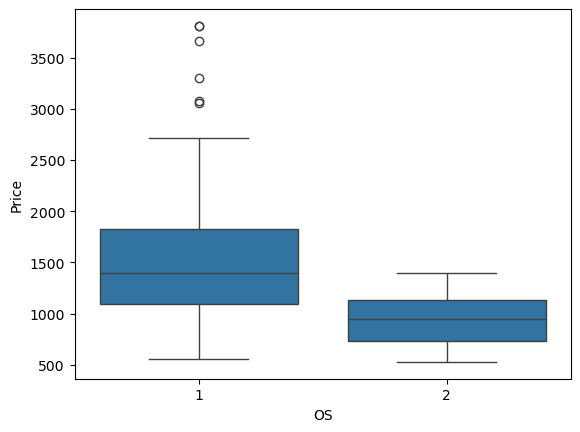

In [33]:
sns.boxplot(x = "OS", y = "Price", data = df)

<Axes: xlabel='CPU_core', ylabel='Price'>

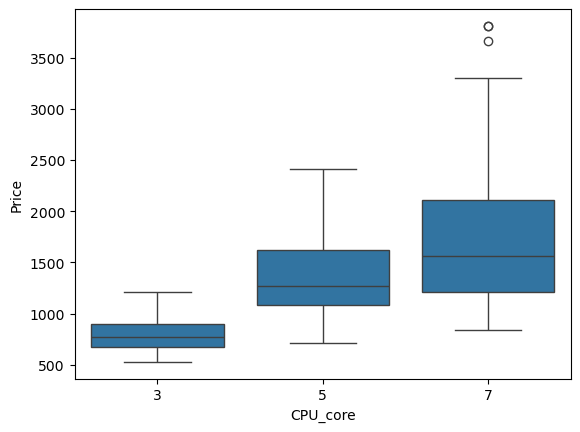

In [37]:
sns.boxplot(x = "CPU_core", y = "Price", data = df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

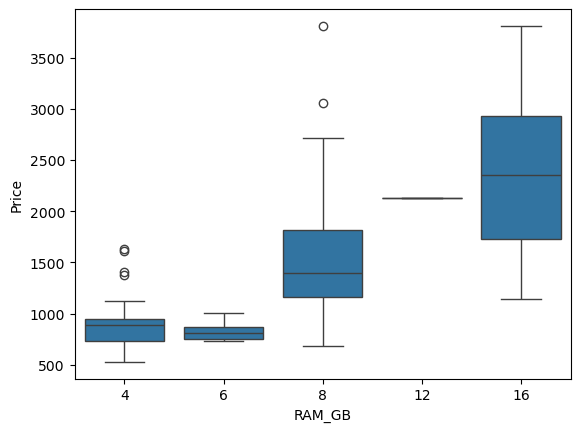

In [39]:
sns.boxplot(x = "RAM_GB", y = "Price", data = df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

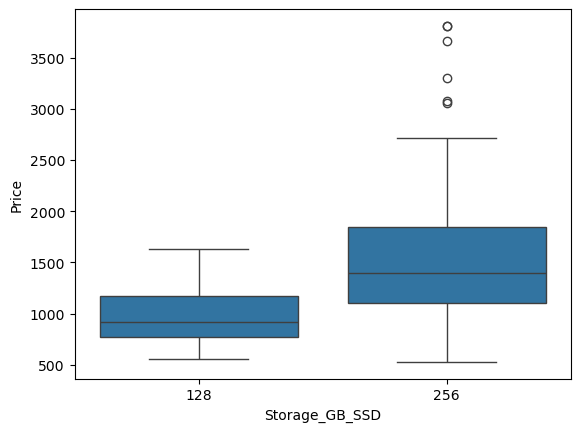

In [41]:
sns.boxplot(x = "Storage_GB_SSD", y = "Price", data = df)

# Task 2 - Descriptive Statistical Analysis
Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [51]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

In [57]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [59]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


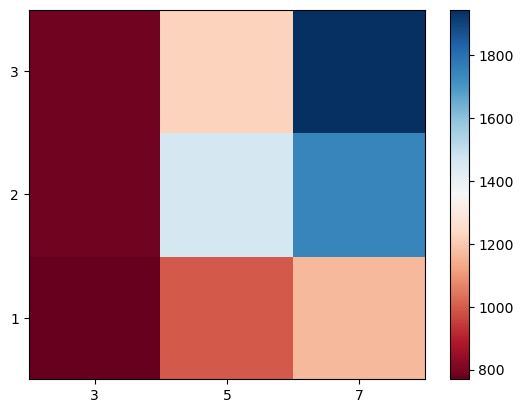

In [61]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#Nombres de etiqueta
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#Insertar la etiquetas
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [64]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857845  with a P-value of P = 3.681560628842711e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588626  with a P-value of P = 5.502463350713296e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118291  with a P-value of P = 0.08853397846830666
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751554  with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355117  with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827376  with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273  w